<a href="https://colab.research.google.com/github/FJSD08/master-series-forecasting-notebook/blob/main/EnbPI_Forquilhas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install aws-fortuna==0.1.36

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.0/321.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.2/227.2 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.2/197.2 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.0/214.0 MB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 10.7 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      S

In [3]:
!pip install jax==0.4.14
!pip install jaxlib==0.4.14

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for jax: filename=jax-0.4.14-py3-none-any.whl size=1535361 sha256=a38f464088df6b755578bfbef6e21c32a33e0d675ac63bcb736639196a1d31c8
  Stored in directory: /root/.cache/pip/wheels/85/52/e7/dfa571c9f9b879e3facaa1584f52be04c4c3d1e14054ef40ab
Successfully built jax
  Attempting uninstall: jax
    Found existing installation: jax 0.4.26
    Uninstalling jax-0.4.26:
      Successfully uninstalled jax-0.4.26
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.86 requires jax>=0.4.16, but you have jax 0.4.14 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.7/73.7 MB 8.8 MB/s eta 0:00:00
  Attempting uninstall: jaxlib


In [4]:
import ml_dtypes
import numpy as np
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import HistGradientBoostingRegressor

from fortuna.conformal import EnbPI
from fortuna.conformal import QuantileConformalRegressor
from fortuna.metric.regression import prediction_interval_coverage_probability


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data = pd.read_excel('/content/drive/MyDrive/Mestrado/DataSet_PZs_ForquilhasV.xlsx')
data

,TIMESTAMP,PZE01,PZE03,PZE04,PZE05,PZE06,PZE07,PZE08,PZE09,PZE10,PZE11,PZE12,PZE13
0,2023-01-17 11:00:00,1.342951,-0.182565,0.029329,-0.030523,-0.413892,0.028997,0.186868,4.332498,3.278466,3.582648,2.035457,4.734820
1,2023-01-17 12:00:00,1.323022,-0.173670,0.030126,-0.032635,-0.420420,0.032528,0.180509,4.326719,3.275582,3.589416,2.039707,4.735727
2,2023-01-17 13:00:00,1.327751,-0.179015,0.043033,-0.037601,-0.430876,0.033393,0.177111,4.325400,3.275379,3.588884,2.035494,4.731488
3,2023-01-17 14:00:00,1.336536,-0.173631,0.042637,-0.028208,-0.422311,0.033751,0.182295,4.332095,3.275108,3.589302,2.035837,4.733491
4,2023-01-17 15:00:00,1.340861,-0.185186,0.039688,-0.033874,-0.421856,0.029028,0.179038,4.337240,3.274470,3.592537,2.034507,4.732096
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3949,2023-07-02 13:00:00,1.650003,-0.167794,0.032550,-0.034736,-0.541352,0.030934,0.172135,4.254673,3.188140,3.658848,2.013674,4.750950
3950,2023-07-02 14:00:00,1.650445,-0.169779,0.032408,-0.032878,-0.540463,0.030565,0.171855,4.255033,3.187416,3.657538,2.013823,4.752974
3951,2023-07-02 15:00:00,1.653503,-0.172255,0.032266,-0.031019,-0.539573,0.030115,0.171576,4.255394,3.186692,3.657295,2.013971,4.754998
3952,2023-07-02 16:00:00,1.656560,-0.174731,0.032124,-0.029161,-0.538684,0.029664,0.171296,4.255754,3.185967,3.657051,2.014120,4.757022


In [7]:
# Convertendo a coluna 'TIMESTAMP' para o formato datetime
data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'], format='%d/%m/%Y %H:%M')

# Definindo 'TIMESTAMP' como índice do DataFrame
data.set_index('TIMESTAMP', inplace=True)

In [8]:
# Supondo que 'data' é um DataFrame Pandas e 'target' é a coluna que você deseja prever
X = data.drop('PZE13', axis=1)  # Substitua 'target' pelo nome real da sua variável dependente
y = data['PZE13']  # Variável dependente

In [9]:
# Dividir os dados em treino e teste não é tão simples quanto uma divisão aleatória em dados temporais
# Walk-Forward Validation para séries temporais
n_train = int(len(X) * 0.8)
X_train, X_test = X[:n_train], X[n_train:]
y_train, y_test = y[:n_train], y[n_train:]

print(f"Treino: {len(X_train)}, Teste: {len(X_test)} ")

Treino: 3163, Teste: 791 


In [10]:
import numpy as np

class DataFrameBootstrapper:
    def __init__(self, n_samples: int):
        self.n_samples = n_samples

    def __call__(
        self, X: np.ndarray, y: np.ndarray
    ) -> tuple[np.ndarray, list[tuple[np.ndarray, np.ndarray]]]:
        indices = np.random.choice(y.shape[0], size=(self.n_samples, y.shape[0]))
        return indices, [(X.iloc[idx], y.iloc[idx]) for idx in indices]

In [11]:
n_bs_samples = 12
bs_indices, bs_train_data = DataFrameBootstrapper(n_samples=n_bs_samples)(
    X_train, y_train
)

In [12]:
# returns 11 boostrap samples from the training set
bs_indices.shape

(12, 3163)

In [13]:
bs_indices

array([[1709, 1209, 2878, ..., 1059, 2908,  502],
       [1468, 2963, 2330, ..., 2498, 3100, 2973],
       [ 728, 1346, 2789, ..., 2046, 2696, 2436],
       ...,
       [2667, 1530, 2706, ..., 1247, 2987, 1376],
       [ 852,   54, 2482, ...,  459, 2558, 2934],
       [1087,  813,  947, ..., 2597,  287,  349]])

In [14]:
X_train.shape

(3163, 11)

In [15]:
len(bs_train_data)

12

In [16]:
# first bootstrap sample - X
bs_train_data[0][0]

,PZE01,PZE03,PZE04,PZE05,PZE06,PZE07,PZE08,PZE09,PZE10,PZE11,PZE12
TIMESTAMP,,,,,,,,,,,
2023-03-30 11:00:00,1.725144,-0.177218,0.148117,-0.034266,-0.495249,0.030870,0.169762,4.292085,3.243867,3.715074,2.026826
2023-03-09 12:00:00,1.741194,-0.165968,0.213854,-0.033765,-0.471089,0.028425,0.177508,4.315929,3.279594,3.754789,2.039925
2023-05-18 19:00:00,1.701427,-0.175646,0.030935,-0.029510,-0.507430,0.027166,0.170363,4.285522,3.221179,3.695683,2.017674
2023-02-02 19:00:00,1.321088,-0.182700,0.054176,-0.032913,-0.436526,0.028131,0.186836,4.354310,3.284822,3.657457,2.045495
2023-01-29 09:00:00,1.330669,-0.189980,0.060051,-0.033241,-0.426270,0.029462,0.178656,4.353530,3.279259,3.628069,2.042562
...,...,...,...,...,...,...,...,...,...,...,...
2023-02-25 07:00:00,1.728830,-0.182763,0.145053,-0.032924,-0.449004,0.036099,0.181218,4.345093,3.329180,3.777530,2.049425
2023-04-13 06:00:00,1.693404,-0.183626,0.105157,-0.031270,-0.512070,0.028206,0.167275,4.302876,3.236209,3.709760,2.027100
2023-03-03 06:00:00,1.738866,-0.183276,0.205923,-0.031623,-0.460839,0.029176,0.186851,4.340458,3.298790,3.764632,2.044707


In [17]:
# first bootstrap sample - y
bs_train_data[0][1]

TIMESTAMP
2023-03-30 11:00:00    4.780241
2023-03-09 12:00:00    4.796913
2023-05-18 19:00:00    4.772132
2023-02-02 19:00:00    4.762761
2023-01-29 09:00:00    4.746931
                         ...   
2023-02-25 07:00:00    4.804365
2023-04-13 06:00:00    4.781365
2023-03-03 06:00:00    4.805259
2023-05-20 01:00:00    4.773399
2023-02-07 17:00:00    4.762130
Name: PZE13, Length: 3163, dtype: float64

In [18]:
# Get a boolean series where True indicates the index is duplicated
duplicate_indices = bs_train_data[0][0].index.duplicated(keep=False)

# Print the duplicated indices
print(bs_train_data[0][0].index[duplicate_indices])

DatetimeIndex(['2023-03-30 11:00:00', '2023-03-09 12:00:00',
               '2023-05-18 19:00:00', '2023-02-02 19:00:00',
               '2023-01-29 09:00:00', '2023-02-20 06:00:00',
               '2023-04-03 02:00:00', '2023-04-30 10:00:00',
               '2023-05-28 11:00:00', '2023-04-23 09:00:00',
               ...
               '2023-02-27 00:00:00', '2023-01-20 09:00:00',
               '2023-05-02 22:00:00', '2023-03-11 14:00:00',
               '2023-01-27 16:00:00', '2023-05-22 07:00:00',
               '2023-02-25 07:00:00', '2023-03-03 06:00:00',
               '2023-05-20 01:00:00', '2023-02-07 17:00:00'],
              dtype='datetime64[ns]', name='TIMESTAMP', length=2018, freq=None)


In [19]:
bs_train_data[0][0].loc[bs_train_data[0][0].index[duplicate_indices][0]]

,PZE01,PZE03,PZE04,PZE05,PZE06,PZE07,PZE08,PZE09,PZE10,PZE11,PZE12
TIMESTAMP,,,,,,,,,,,
2023-03-30 11:00:00,1.725144,-0.177218,0.148117,-0.034266,-0.495249,0.03087,0.169762,4.292085,3.243867,3.715074,2.026826
2023-03-30 11:00:00,1.725144,-0.177218,0.148117,-0.034266,-0.495249,0.03087,0.169762,4.292085,3.243867,3.715074,2.026826
2023-03-30 11:00:00,1.725144,-0.177218,0.148117,-0.034266,-0.495249,0.03087,0.169762,4.292085,3.243867,3.715074,2.026826


In [20]:
'''
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor

# Configurando o pipeline com apenas o RandomForestRegressor
rf_pipeline = make_pipeline(
    RandomForestRegressor(random_state=42)
).set_output(transform="pandas")
# Supondo que X_train e y_train sejam suas variáveis de treino
# rf_pipeline.fit(X_train, y_train)  # Você usaria isso para treinar o modelo
# predictions = rf_pipeline.predict(X_test)  # E isso para fazer previsões

'''

'\nfrom sklearn.pipeline import make_pipeline\nfrom sklearn.ensemble import RandomForestRegressor\n\n# Configurando o pipeline com apenas o RandomForestRegressor\nrf_pipeline = make_pipeline(\n    RandomForestRegressor(random_state=42)\n).set_output(transform="pandas")\n# Supondo que X_train e y_train sejam suas variáveis de treino\n# rf_pipeline.fit(X_train, y_train)  # Você usaria isso para treinar o modelo\n# predictions = rf_pipeline.predict(X_test)  # E isso para fazer previsões\n\n'

In [42]:

from sklearn.pipeline import make_pipeline
from sklearn.ensemble import HistGradientBoostingRegressor

# Configurando o pipeline com apenas o HistGradientBoostingRegressor
gbrt_pipeline = make_pipeline(
    HistGradientBoostingRegressor(loss='absolute_error', learning_rate=0.1, max_iter=1000, random_state=42)
).set_output(transform="pandas")


In [43]:

#GRADIENTE BOOSTING

bs_train_preds = np.zeros((n_bs_samples, X_train.shape[0]))
bs_test_preds = np.zeros((n_bs_samples, X_test.shape[0]))
for i, batch in enumerate(bs_train_data):
    gbrt_pipeline.fit(*batch)
    bs_train_preds[i] = gbrt_pipeline.predict(X_train)  # Correção aqui
    bs_test_preds[i] = gbrt_pipeline.predict(X_test)  # Correção aqui



In [ ]:
'''
# RANDOM FOREST

bs_train_preds = np.zeros((n_bs_samples, X_train.shape[0]))
bs_test_preds = np.zeros((n_bs_samples, X_test.shape[0]))
for i, batch in enumerate(bs_train_data):
    rf_pipeline.fit(*batch)
    bs_train_preds[i] = rf_pipeline.predict(X_train)
    bs_test_preds[i] = rf_pipeline.predict(X_test)

'''

In [44]:
predictions = gbrt_pipeline.predict(X_test)  # E isso para fazer previsõesf

In [45]:
conformal_intervals = EnbPI().conformal_interval(
    bootstrap_indices=bs_indices,
    bootstrap_train_preds=bs_train_preds,
    bootstrap_test_preds=bs_test_preds,
    train_targets=y_train.values,
    error=0.05,
)

In [46]:
print(
    "Percentage of intervals containing average bootstrap predictions: "
    f"{prediction_interval_coverage_probability(*conformal_intervals.T, bs_test_preds.mean(0))}."
)
print(
    "Percentage of intervals containing true targets: "
    f"{prediction_interval_coverage_probability(*conformal_intervals.T, y_test.values)}."
)
print(f"Size of the conformal intervals: {np.diff(conformal_intervals)[0][0]}")

Percentage of intervals containing average bootstrap predictions: 1.0.
Percentage of intervals containing true targets: 0.9266751408576965.
Size of the conformal intervals: 0.022762298583984375


In [27]:
'''

import numpy as np
import matplotlib.pyplot as plt

# Suponha que y_test, predictions e conformal_intervals sejam suas séries de dados
# Você precisará garantir que predictions e conformal_intervals também sejam arrays ou pandas Series
# Vamos assumir que todos esses dados já estão alinhados e formatados corretamente.

n_points = len(y_test)  # Calculando o número de pontos de dados

# Criando o gráfico
plt.figure(figsize=(12, 4))
plt.plot(y_test, label="True Test Target", color="blue")
plt.plot(predictions, label="Predictions", color="green", linestyle='--')
plt.fill_between(
    np.arange(n_points),
    conformal_intervals[:, 0],  # Limite inferior
    conformal_intervals[:, 1],  # Limite superior
    alpha=0.5,
    color="gray",
    label="Conformal Interval"
)
plt.xlabel("Data Points", fontsize=14)
plt.ylabel("Values", fontsize=14)
plt.legend(fontsize=11, loc="upper right")
plt.show()

'''

'\n\nimport numpy as np\nimport matplotlib.pyplot as plt\n\n# Suponha que y_test, predictions e conformal_intervals sejam suas séries de dados\n# Você precisará garantir que predictions e conformal_intervals também sejam arrays ou pandas Series\n# Vamos assumir que todos esses dados já estão alinhados e formatados corretamente.\n\nn_points = len(y_test)  # Calculando o número de pontos de dados\n\n# Criando o gráfico\nplt.figure(figsize=(12, 4))\nplt.plot(y_test, label="True Test Target", color="blue")\nplt.plot(predictions, label="Predictions", color="green", linestyle=\'--\')\nplt.fill_between(\n    np.arange(n_points),\n    conformal_intervals[:, 0],  # Limite inferior\n    conformal_intervals[:, 1],  # Limite superior\n    alpha=0.5,\n    color="gray",\n    label="Conformal Interval"\n)\nplt.xlabel("Data Points", fontsize=14)\nplt.ylabel("Values", fontsize=14)\nplt.legend(fontsize=11, loc="upper right")\nplt.show()\n\n'

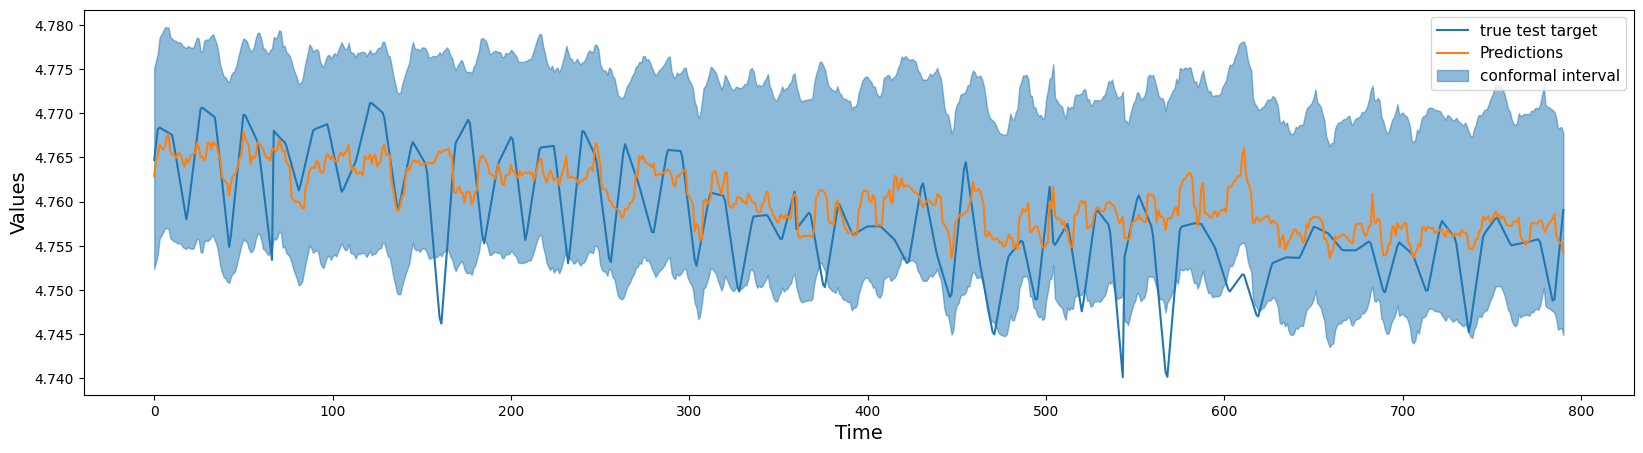

In [47]:
plt.figure(figsize=(20, 5))
plt.plot(y_test.values, label="true test target")
plt.plot(predictions, label="Predictions")
plt.fill_between(
    np.arange(len(y_test)),
    conformal_intervals[:, 0],
    conformal_intervals[:, 1],
    alpha=0.5,
    color="C0",
    label="conformal interval",
)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Values", fontsize=14)
plt.legend(fontsize=11, loc="upper right")
plt.show()

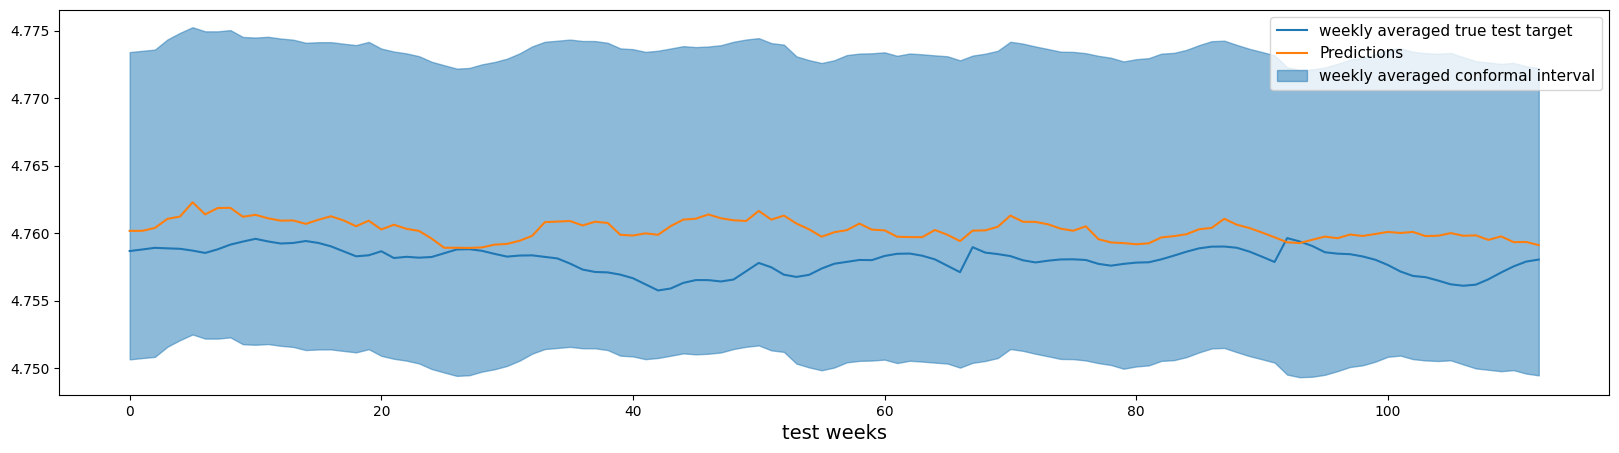

In [48]:
def weakly_avg(x):
    s = x.shape[0] // 7
    x = x[: s * 7]
    return x.reshape(7, s, *x.shape[1:]).mean(0)


weekly_avg_test = weakly_avg(y_test.values)
n_weeks = weekly_avg_test.shape[0]

plt.figure(figsize=(20, 5))
plt.plot(weakly_avg(y_test.values), label="weekly averaged true test target")
plt.plot(weakly_avg(predictions), label="Predictions")
plt.fill_between(
    np.arange(n_weeks),
    *weakly_avg(conformal_intervals).T,
    alpha=0.5,
    color="C0",
    label="weekly averaged conformal interval",
)
plt.xlabel("test weeks", fontsize=14)
plt.legend(fontsize=11, loc="upper right")

In [49]:
batch_size = 1
conformal_intervals2 = np.zeros((len(y_test), 2))
for i in range(0, len(y_test), batch_size):
    if i == 0:
        conformal_intervals2[:batch_size], train_residuals = EnbPI().conformal_interval(
            bootstrap_indices=bs_indices,
            bootstrap_train_preds=bs_train_preds,
            bootstrap_test_preds=bs_test_preds[:, :batch_size],
            train_targets=y_train.values,
            error=0.05,
            return_residuals=True,
        )
    else:
        (
            conformal_intervals2[i : i + batch_size],
            train_residuals,
        ) = EnbPI().conformal_interval_from_residuals(
            train_residuals=train_residuals,
            bootstrap_new_train_preds=bs_test_preds[:, i - batch_size : i],
            bootstrap_new_test_preds=bs_test_preds[:, i : i + batch_size],
            new_train_targets=y_test.values[i - batch_size : i],
            error=0.05,
        )

In [50]:
print(
    "Percentage of intervals containing average bootstrap predictions: "
    f"{prediction_interval_coverage_probability(*conformal_intervals2.T, bs_test_preds.mean(0))}."
)
print(
    "Percentage of intervals containing true targets: "
    f"{prediction_interval_coverage_probability(*conformal_intervals2.T, y_test.values)}."
)

Percentage of intervals containing average bootstrap predictions: 1.0.
Percentage of intervals containing true targets: 0.9456384778022766.


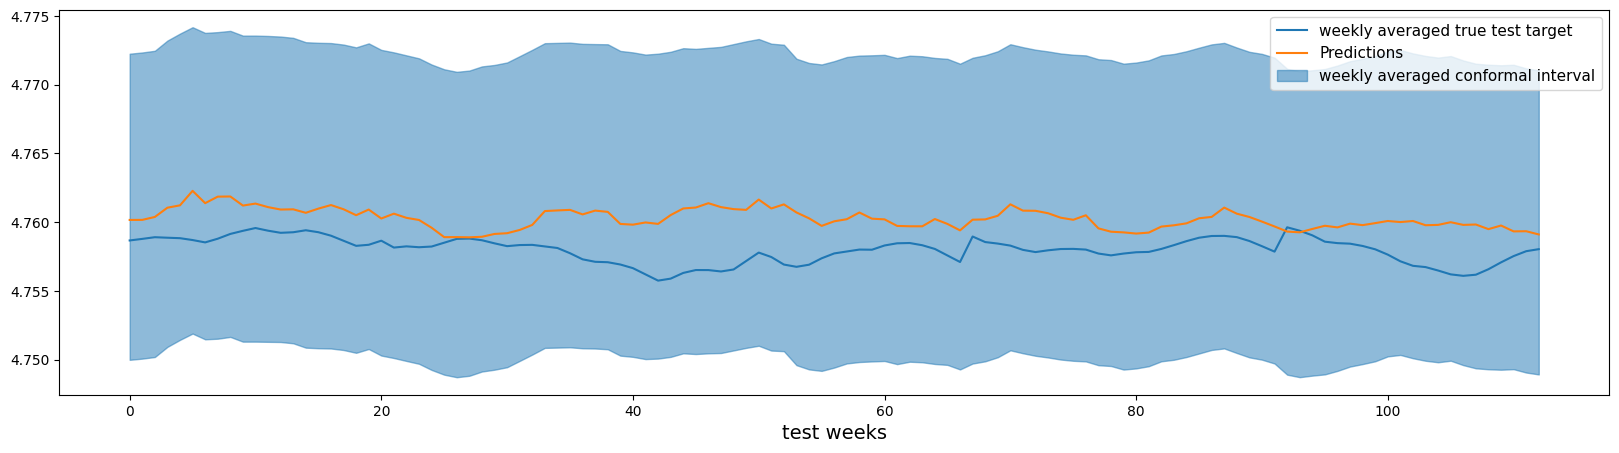

In [55]:
plt.figure(figsize=(20, 5))
plt.plot(weakly_avg(y_test.values), label="weekly averaged true test target")
plt.plot(weakly_avg(predictions), label="Predictions")
plt.fill_between(
    np.arange(n_weeks),
    *weakly_avg(conformal_intervals2).T,
    alpha=0.5,
    color="C0",
    label="weekly averaged conformal interval",
)
plt.xlabel("test weeks", fontsize=14)
plt.legend(fontsize=11, loc="upper right")

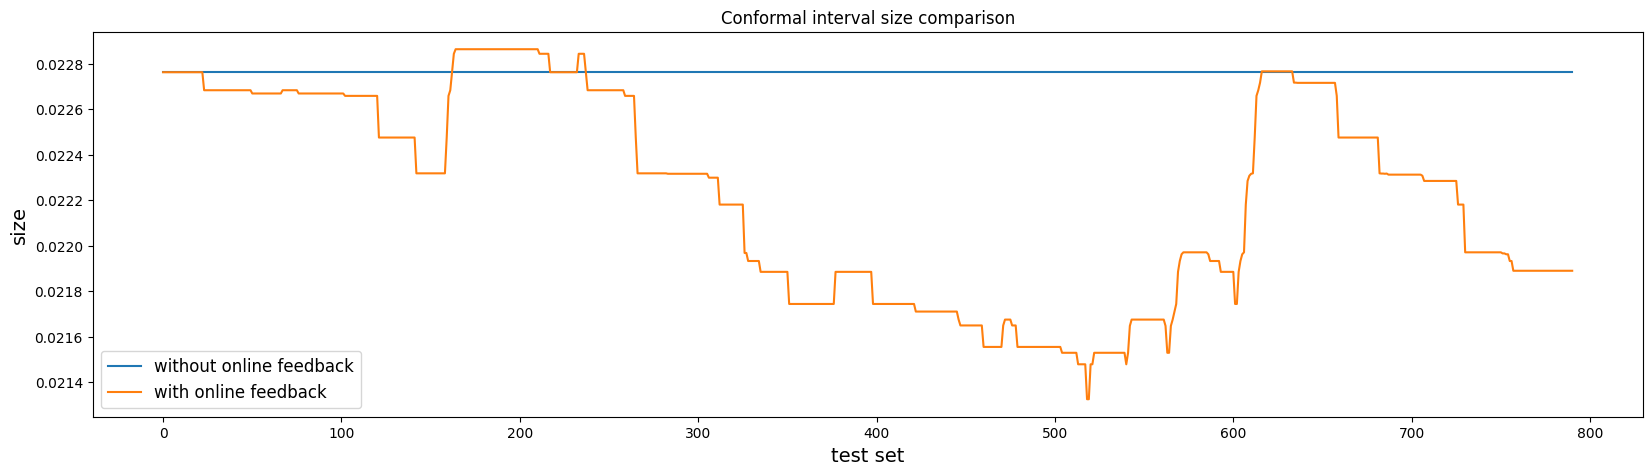

In [52]:
# The following plot compares the size of the intervals without and with online feedback.
plt.figure(figsize=(20, 5))
plt.title("Conformal interval size comparison")
plt.plot(np.diff(conformal_intervals), label="without online feedback")
plt.plot(np.diff(conformal_intervals2), label="with online feedback")
plt.xlabel("test set", fontsize=14)
plt.ylabel("size", fontsize=14)
plt.legend(fontsize=12)